In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os
from PIL import Image

In [2]:
# 从MNIST_data/中读取MNIST数据。这条语句在数据不存在时，会自动执行下载
mnist = input_data.read_data_sets("../../deepLearning/dataset/", one_hot=True)

# 查看训练数据的大小
print(mnist.train.images.shape)  # (55000, 784)
print(mnist.train.labels.shape)  # (55000, 10)

# 查看验证数据的大小
print(mnist.validation.images.shape)  # (5000, 784)
print(mnist.validation.labels.shape)  # (5000, 10)

# 查看测试数据的大小
print(mnist.test.images.shape)  # (10000, 784)
print(mnist.test.labels.shape)  # (10000, 10)

# 打印出第0幅图片的向量表示
#print(mnist.train.images[0, :])
# 打印出第0幅图片的标签
#print(mnist.train.labels[0, :])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../deepLearning/dataset/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../deepLearning/dataset/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../deepLearning/dataset/t10k-images-idx3-ubyte.gz
Extracting ../../deepLearning/dataset/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
(55000, 10)
(5000, 784)
(5000, 10)
(10000, 784)
(10000, 10)


[7, 3, 4, 6, 1, 8, 1, 0, 9, 8, 0, 3, 1, 2, 7, 0, 2, 9, 6, 0]


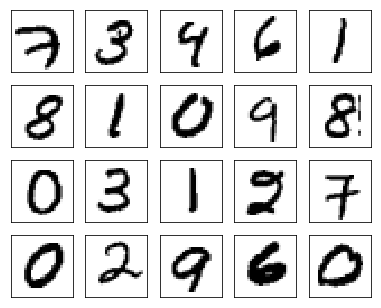

In [3]:
# 如果没有这个文件夹会自动创建
fig = plt.figure(figsize=(5, 4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)
# 保存前20张图片
image_labels = []

for i in range(20):
    # 请注意，mnist.train.images[i, :]就表示第i张图片（序号从0开始）
    image_array = mnist.train.images[i, :]
    image_labels.append(np.argmax(mnist.train.labels[i, :]))
    ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    ax.imshow(image_array.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')

print(image_labels)
plt.show()


In [4]:

# 创建x，x是一个占位符（placeholder），代表待识别的图片
x = tf.placeholder(tf.float32, [None, 784])

# W是Softmax模型的参数，将一个784维的输入转换为一个10维的输出
# 在TensorFlow中，变量的参数用tf.Variable表示
W = tf.Variable(tf.zeros([784, 100]))
# b是又一个Softmax模型的参数，我们一般叫做“偏置项”（bias）。
b = tf.Variable(tf.zeros([100]))
#sigmoid relu
# 添加了一层 好像很失败，怎么都不能提高效果
a = tf.nn.sigmoid(tf.matmul(x, W) + b)
W2 = tf.Variable(tf.zeros([100, 10]))
# b是又一个Softmax模型的参数，我们一般叫做“偏置项”（bias）。
b2 = tf.Variable(tf.zeros([10]))

# y=softmax(Wx + b)，y表示模型的输出
y = tf.nn.softmax(tf.matmul(a, W2) + b2)

# y_是实际的图像标签，同样以占位符表示。
y_ = tf.placeholder(tf.float32, [None, 10])

# 至此，我们得到了两个重要的Tensor：y和y_。
# y是模型的输出，y_是实际的图像标签，不要忘了y_是独热表示的
# 下面我们就会根据y和y_构造损失

# 根据y, y_构造交叉熵损失
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y)))

# 有了损失，我们就可以用随机梯度下降针对模型的参数（W和b）进行优化
#  .GradientDescentOptimizer AdagradOptimizer
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)

# 创建一个Session。只有在Session中才能运行优化步骤train_step。
sess = tf.InteractiveSession()
# 运行之前必须要初始化所有变量，分配内存。
tf.global_variables_initializer().run()
print('start training...')

# 进行1000步梯度下降
for _ in range(10000):
    # 在mnist.train中取100个训练数据
    # batch_xs是形状为(100, 784)的图像数据，batch_ys是形如(100, 10)的实际标签
    # batch_xs, batch_ys对应着两个占位符x和y_
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 在Session中运行train_step，运行时要传入占位符的值
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# 正确的预测结果
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
# 计算预测准确率，它们都是Tensor
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# 在Session中运行Tensor可以得到Tensor的值
# 这里是获取最终模型的正确率
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))  # 0.9185

sess.close()

start training...
0.6573


In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [6]:
# x为训练图像的占位符、y_为训练图像标签的占位符
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# 将单张图片从784维向量重新还原为28x28的矩阵图片
x_image = tf.reshape(x, [-1, 28, 28, 1])

# 第一层卷积层
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# 第二层卷积层
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 全连接层，输出为1024维的向量
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
# 使用Dropout，keep_prob是一个占位符，训练时为0.5，测试时为1
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 把1024维的向量转换成10维，对应10个类别
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# 我们不采用先Softmax再计算交叉熵的方法，而是直接用tf.nn.softmax_cross_entropy_with_logits直接计算
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
# 同样定义train_step
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# 定义测试的准确率
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 创建Session和变量初始化
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# 训练20000步
for i in range(100):
    batch = mnist.train.next_batch(50)
    # 每100步报告一次在验证集上的准确度
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g" % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

# 训练结束后报告在测试集上的准确度
print("test accuracy %g" % accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
sess.close()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

step 0, training accuracy 0.06
test accuracy 0.8121


In [7]:
# 我们把原始图片保存在MNIST_data/raw/文件夹下
# 如果没有这个文件夹会自动创建
save_dir = 'MNIST_data/'
if os.path.exists(save_dir) is False:
    os.makedirs(save_dir)

# 保存前20张图片
for i in range(20):
    # 请注意，mnist.train.images[i, :]就表示第i张图片（序号从0开始）
    image_array = mnist.train.images[i, :]
    # TensorFlow中的MNIST图片是一个784维的向量，我们重新把它还原为28x28维的图像。
    image_data = image_array.copy()
    image_data = image_data.reshape(28, 28)
    image_data = (255 - image_data * 255)
    # 保存文件的格式为 mnist_train_0.jpg, mnist_train_1.jpg, ... ,mnist_train_19.jpg
    filename = save_dir + 'mnist_train_%d.jpg' % i
    # 将image_array保存为图片
    # 先用scipy.misc.toimage转换为图像，再调用save直接保存。
    image = Image.fromarray(image_data)
    image = image.convert('RGB')
    image.save(filename)

print('Please check: %s ' % save_dir)


Please check: MNIST_data/ 
